### Classification Problem of different types of glass based on their chemical composition using supervised learning techniques.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploratory Data Analysis(EDA)
# Load data
df = pd.read_csv('glass.csv')

In [33]:
print(df.head())
print(df.info())
print(df.isna().sum()) # to check missing values

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
RI   

In [34]:
#since there is no missing values , we will proceed
print(df['Type'].value_counts()) # for class imbalance
print(df.describe)

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64
<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [36]:
# check for duplicate values
df.duplicated().sum()

np.int64(1)

In [37]:
# dropping duplicated value

df.drop_duplicates(inplace=True)

In [38]:
# rechecking
df.duplicated().sum()

np.int64(0)

In [39]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


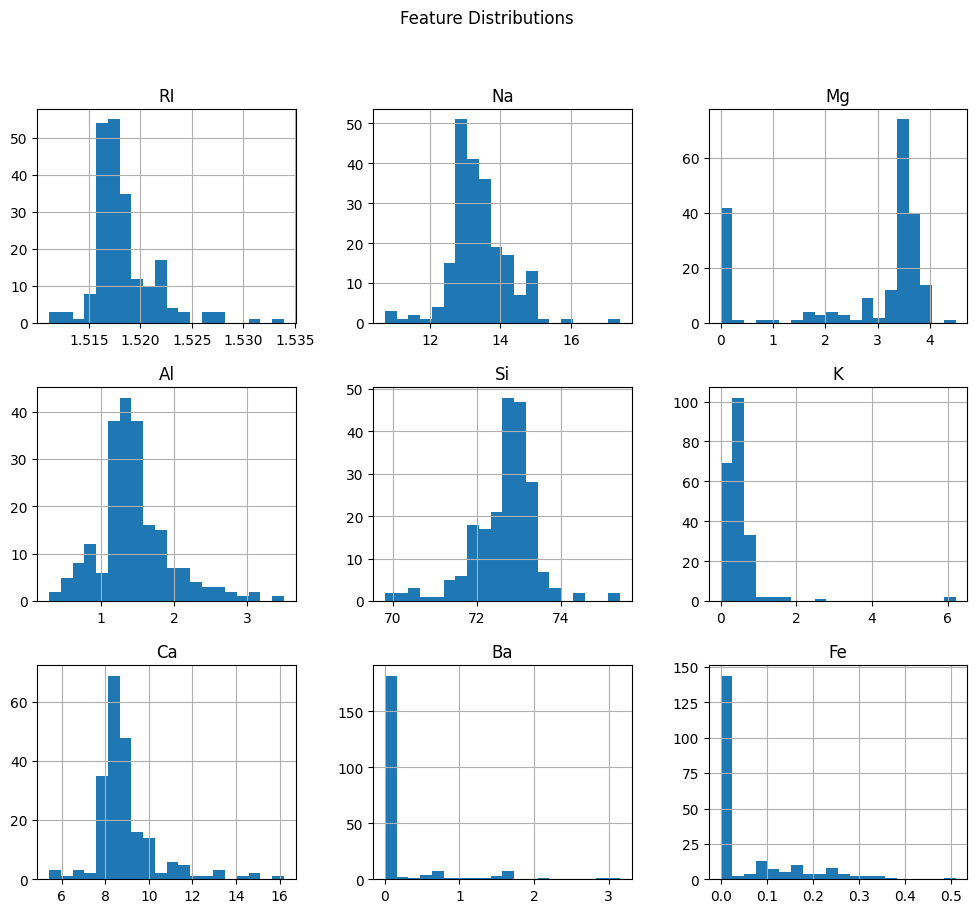

/tmp/ipython-input-40-2460680419.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2')


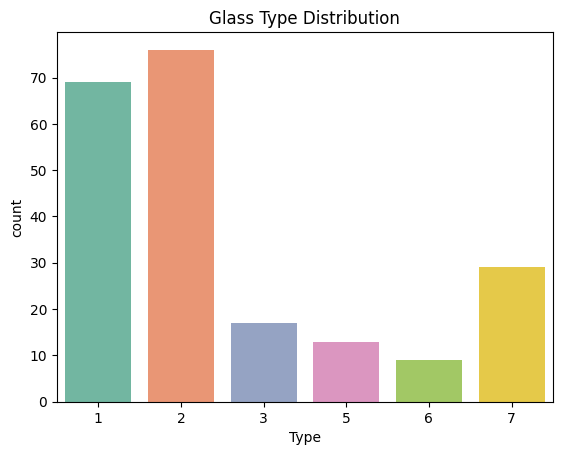

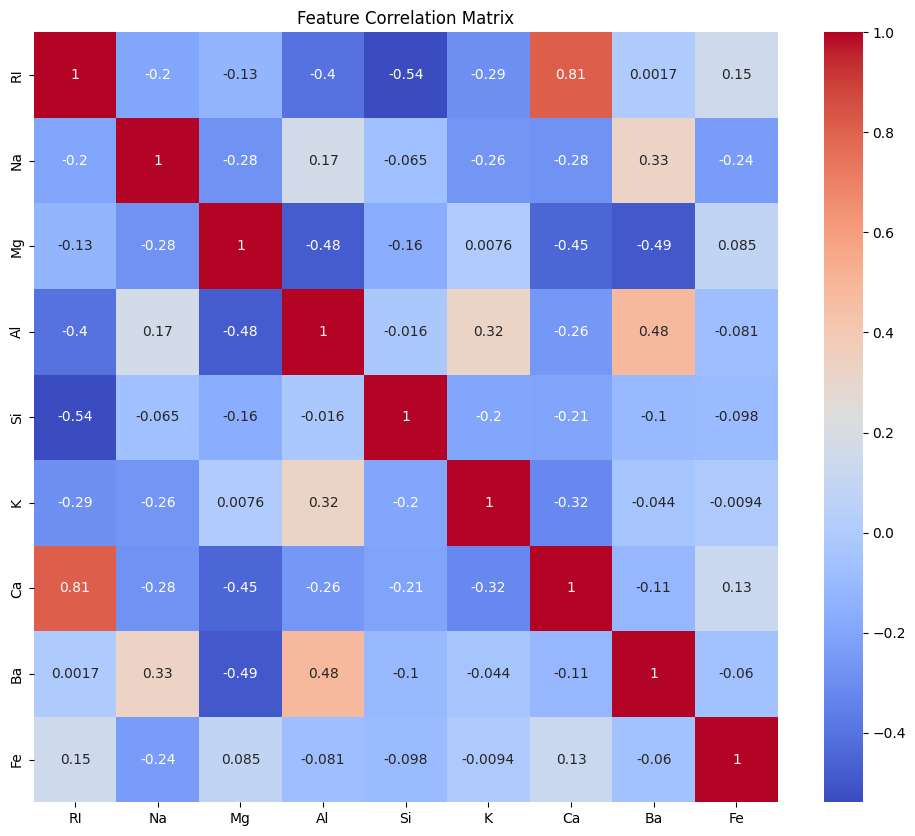

In [40]:
#Distribution of each chemical feature
df.drop(columns=['Type']).hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

# Class balance
sns.countplot(x='Type', data=df, palette='Set2')
plt.title('Glass Type Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(columns=['Type']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [41]:
#2. For Preprocessing the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Splitting feature and target
X = df.drop('Type', axis=1)
y = df['Type']

# Encoding the labels
glass_labels = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',  # Not used in this dataset
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

In [42]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# To standardize features

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # use 'box-cox' only if all features are positive
X_transformed = pt.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [44]:
#3. Model Building
# To choose train and classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [45]:
#Training the model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
     "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True)
}

results = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_scaled)
    results[name] = (model, y_pred)


===  Logistic Regression ===
 Accuracy: 0.627906976744186
 Classification Report:
               precision    recall  f1-score   support

           1     0.7273    0.5714    0.6400        14
           2     0.7500    0.4000    0.5217        15
           3     0.2222    0.6667    0.3333         3
           5     0.6000    1.0000    0.7500         3
           6     0.6667    1.0000    0.8000         2
           7     0.8571    1.0000    0.9231         6

    accuracy                         0.6279        43
   macro avg     0.6372    0.7730    0.6614        43
weighted avg     0.7064    0.6279    0.6320        43



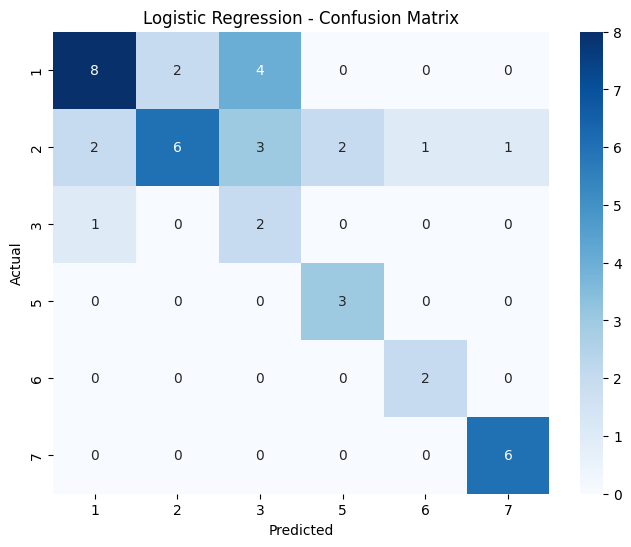


===  K-Nearest Neighbors ===
 Accuracy: 0.7441860465116279
 Classification Report:
               precision    recall  f1-score   support

           1     0.8462    0.7857    0.8148        14
           2     0.6923    0.6000    0.6429        15
           3     0.5000    0.6667    0.5714         3
           5     0.6000    1.0000    0.7500         3
           6     0.6667    1.0000    0.8000         2
           7     1.0000    0.8333    0.9091         6

    accuracy                         0.7442        43
   macro avg     0.7175    0.8143    0.7480        43
weighted avg     0.7643    0.7442    0.7458        43



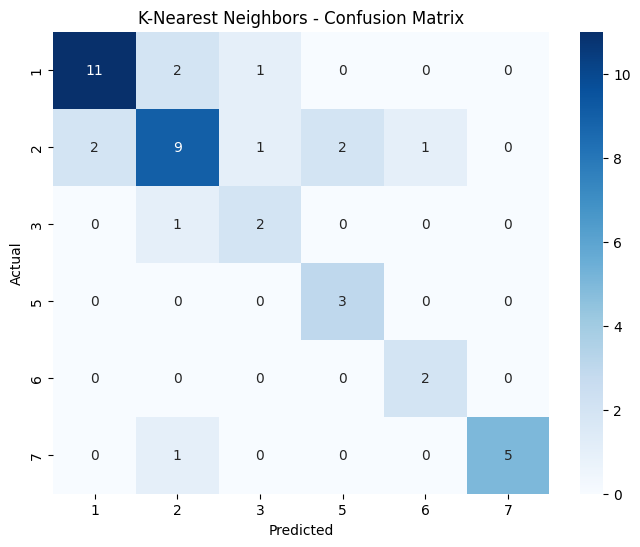


===  Random Forest ===
 Accuracy: 0.813953488372093
 Classification Report:
               precision    recall  f1-score   support

           1     0.8462    0.7857    0.8148        14
           2     0.7857    0.7333    0.7586        15
           3     0.6000    1.0000    0.7500         3
           5     1.0000    1.0000    1.0000         3
           6     0.6667    1.0000    0.8000         2
           7     1.0000    0.8333    0.9091         6

    accuracy                         0.8140        43
   macro avg     0.8164    0.8921    0.8388        43
weighted avg     0.8317    0.8140    0.8161        43



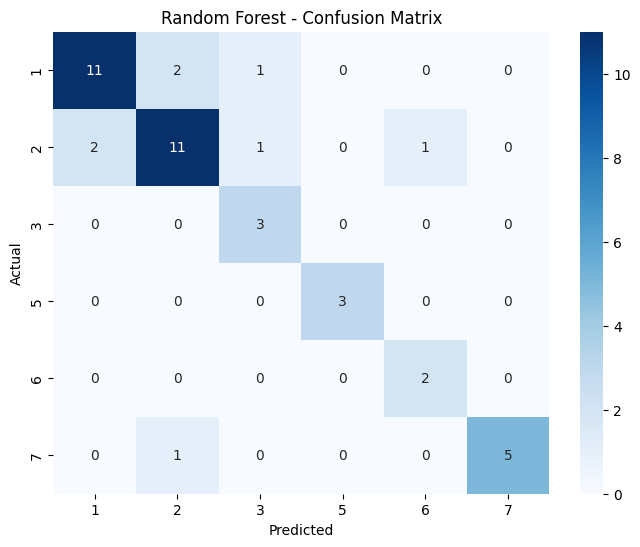


===  SVM (RBF Kernel) ===
 Accuracy: 0.6976744186046512
 Classification Report:
               precision    recall  f1-score   support

           1     0.7273    0.5714    0.6400        14
           2     0.6667    0.6667    0.6667        15
           3     0.4000    0.6667    0.5000         3
           5     1.0000    1.0000    1.0000         3
           6     0.5000    0.5000    0.5000         2
           7     0.8571    1.0000    0.9231         6

    accuracy                         0.6977        43
   macro avg     0.6918    0.7341    0.7050        43
weighted avg     0.7099    0.6977    0.6976        43



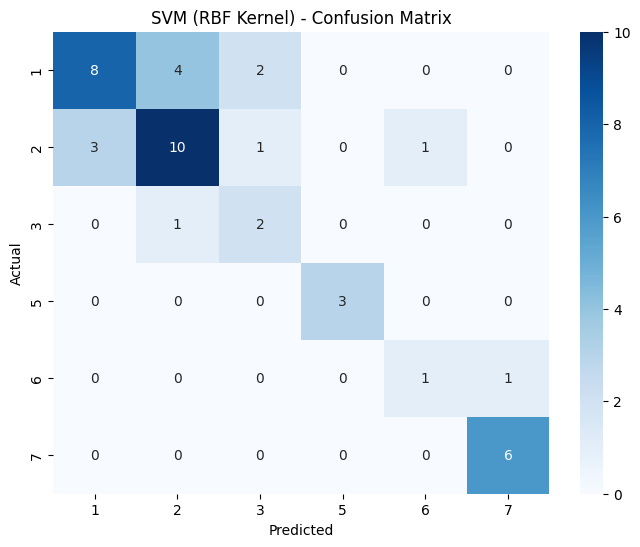

In [46]:
#Model Evaluation with Classification Report and Confusion Matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for name, (model, y_pred) in results.items():
    print(f"\n===  {name} ===")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print(" Classification Report:\n", classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Access the trained models from the results dictionary
rfc_model = results["Random Forest"][0]
lr_model = results["Logistic Regression"][0]
knn_model = results["K-Nearest Neighbors"][0]

y_pred_rfc = rfc_model.predict(X_test_scaled)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

In [48]:
# Summarization
print("\n=== 🔍 Summary Report ===")

# Evaluate all models
evaluation_data = [
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, y_pred_rfc),
        "Precision (macro)": precision_score(y_test, y_pred_rfc, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred_rfc, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_test, y_pred_rfc, average='macro', zero_division=0)
    },
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "Precision (macro)": precision_score(y_test, y_pred_lr, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred_lr, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_test, y_pred_lr, average='macro', zero_division=0)
    },
    {
        "Model": "K-Nearest Neighbors",
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision (macro)": precision_score(y_test, y_pred_knn, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred_knn, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_test, y_pred_knn, average='macro', zero_division=0)
    }
]

# Display evaluation summary as DataFrame
evaluation_df = pd.DataFrame(evaluation_data)
print("\n📊 Model Evaluation Summary:")
print(evaluation_df)

# Find best model based on accuracy
best_model_name = evaluation_df.loc[evaluation_df["Accuracy"].idxmax(), "Model"]
print(f"\n🏆 Best Performing Model: **{best_model_name}**")

# Feature importance (Random Forest)
importances = rfc_model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\n🌟 Top Influential Features (Random Forest):")
print(important_features.head(5))

# Challenges
print("\n⚠️ Challenges Faced:")
print("- Class imbalance handled using SMOTE")
print("- Some features are highly correlated → may affect linear models")
print("- Dataset is small → risk of overfitting with complex models")


=== 🔍 Summary Report ===

📊 Model Evaluation Summary:
                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0        Random Forest  0.813953           0.816422        0.892063   
1  Logistic Regression  0.627907           0.637217        0.773016   
2  K-Nearest Neighbors  0.744186           0.717521        0.814286   

   F1-Score (macro)  
0          0.838754  
1          0.661358  
2          0.748032  

🏆 Best Performing Model: **Random Forest**

🌟 Top Influential Features (Random Forest):
Mg    0.194799
K     0.140971
Ca    0.136236
Na    0.127137
RI    0.114458
dtype: float64

⚠️ Challenges Faced:
- Class imbalance handled using SMOTE
- Some features are highly correlated → may affect linear models
- Dataset is small → risk of overfitting with complex models


In [56]:
import pickle
pickle.dump(rfc_model, open('glass.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))